In [1]:
import numpy
from scipy.optimize import linprog
import matplotlib.pyplot as plt

<h3>求可生產最多產品數量</h3>
<ul>
    <li>生產要素: $x_1 \geq 0$ 及 $ 0 \leq x_2 \leq 4$</li>
    <li>每生產一單位 z 產品，需要消耗: $x_1$ 及 $2x_2$</li>
    <li>$x_1$ 數量 $\leq$ $10 - 2x_2$</li>
    <li>$x_1$ 數量 $\geq$ $1 - x_2$</li>
</ul>

<table><tr><td>
$ 
max \\
\: \: \: \: z = x_1 + 2{x_2} \\
s.t. \\
\: \: \: \: x_1 + 2{x_2} \leq 10 \\
\: \: \: \: x_1 + x_2 \geq 1 \\
\: \: \: \: x_1 \geq 0 \\
\: \: \: \: 0 \leq x_2 \leq 4
$
    </td><td>
$ 
min \\
\: \: \: \: z^- = -x_1 - 2{x_2} \\
s.t. \\
\: \: \: \: x_1 + 2{x_2} \leq 10 \\
\: \: \: \: -x_1 - x_2 \leq 1 \\
\: \: \: \: x_1 \geq 0 \\
\: \: \: \: 0 \leq x_2 \leq 4
$
    <td></tr></table>

<h3>指派係數</h3>

In [2]:
c = numpy.array([-1, -2])
A = numpy.array([[1, 2], [-1, -1]])
b = numpy.array([10, 1])

<h3>求解</h3>

In [3]:
res = linprog(
    c, A_ub=A, b_ub=b, 
    bounds=[(0, None), (0, 4)],
    method='simplex'
)

<h3>最佳化</h3>

In [4]:
res

     con: array([], dtype=float64)
     fun: -10.0
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([0., 9.])
  status: 0
 success: True
       x: array([10.,  0.])

<h3>最大化 $fun = -z$</h3>

In [5]:
if res.success:
    print(r'z = %f' % -int(res.fun))

z = 10.000000


<h3>圖解</h3>

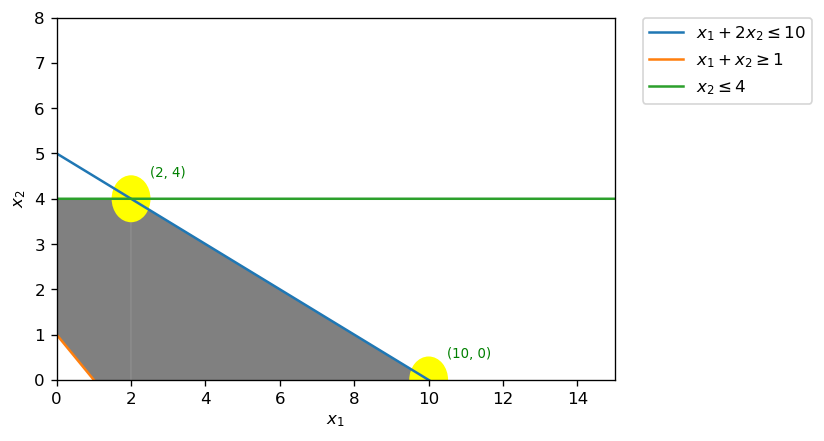

In [63]:
fig, ax = plt.subplots(dpi=120)

x1 = numpy.linspace(0, 40, 10000)

y1 = 5 - 0.5*x1
y2 = 1 - x1
y3 = [4] * len(x1)

ax.plot(x1, y1, label=r'$x_1 + 2{x_2} \leq 10$')
ax.plot(x1, y2, label=r'$x_1 + x_2 \geq 1$')
ax.plot(x1, y3, label=r'$x_2 \leq 4$')

circle1 = plt.Circle((res.x[0], res.x[1]), 0.5, color='yellow')
circle2 = plt.Circle((2, 4), 0.5, color='yellow')

ax.add_patch(circle1)
ax.add_patch(circle2)

ax.text(2+0.5, 4+0.5, '(%d, %d)' % (2, 4), fontsize=8, color='green')
ax.text(res.x[0]+0.5, res.x[1]+0.5, '(%d, %d)' % (int(res.x[0]), int(res.x[1])), fontsize=8, color='green')

ax.fill_between(x1, y1, y2, where=y1 <= 4, facecolor='gray')
ax.fill_between(x1, y2, y3, where=(x1 <= 2) & (y2 <= y1), facecolor='gray')

ax.set_xlim(0, 15)
ax.set_ylim(0, 8)

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')

plt.show()